In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv(r'C:\Users\USER\Desktop\chinmay\projects\iphone_sales_data.csv')
df.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01-03-2021 00:47
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01-03-2021 02:04
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01-03-2021 09:10
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01-03-2021 09:49
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01-03-2021 10:56


In [6]:
df.isnull().sum()

Name                0
Email               0
Product             0
Transaction Date    0
dtype: int64

In [7]:
df.describe()

,Name,Email,Product,Transaction Date
count,581,581,581,581
unique,525,525,252,549
top,PERSON_470,PERSON_470@gmail.com,PRODUCT_75,07-03-2021 21:43
freq,5,5,74,3


In [8]:
df.columns

Index(['Name', 'Email', 'Product', 'Transaction Date'], dtype='object')

In [10]:
df['Time'] = pd.to_datetime(df['Transaction Date'])
df.head()

,Name,Email,Product,Transaction Date,Time
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01-03-2021 00:47,2021-01-03 00:47:00
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01-03-2021 02:04,2021-01-03 02:04:00
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01-03-2021 09:10,2021-01-03 09:10:00
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01-03-2021 09:49,2021-01-03 09:49:00
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01-03-2021 10:56,2021-01-03 10:56:00


In [12]:
df['Hour'] = (df['Time']).dt.hour
df.head()

,Name,Email,Product,Transaction Date,Time,Hour
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01-03-2021 00:47,2021-01-03 00:47:00,0
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01-03-2021 02:04,2021-01-03 02:04:00,2
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01-03-2021 09:10,2021-01-03 09:10:00,9
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01-03-2021 09:49,2021-01-03 09:49:00,9
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01-03-2021 10:56,2021-01-03 10:56:00,10


In [15]:
timemost1 = df['Hour'].value_counts().index.tolist()[:24]
timemost2 = df['Hour'].value_counts().values.tolist()[:24]


In [16]:
tmost = np.column_stack((timemost1,timemost2))
print("Hour of Day" + "\t" + "Cumulative Number of Purchases \n")
print('\n'.join('\t\t'.join(map(str,row)) for row in tmost))

Hour of Day	Cumulative Number of Purchases 

23		51
12		51
22		45
19		42
21		41
15		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


In [18]:
timemost = df['Hour'].value_counts()
timemost1 = []
for i in range(0,23):
    timemost1.append(i)

timemost2 = timemost.sort_index()
timemost2.tolist()
timemost2 = pd.DataFrame(timemost2)

In [19]:
timemost2

,count
Hour,
0,17
1,4
2,3
3,1
5,3
6,2
7,6
8,10
9,14


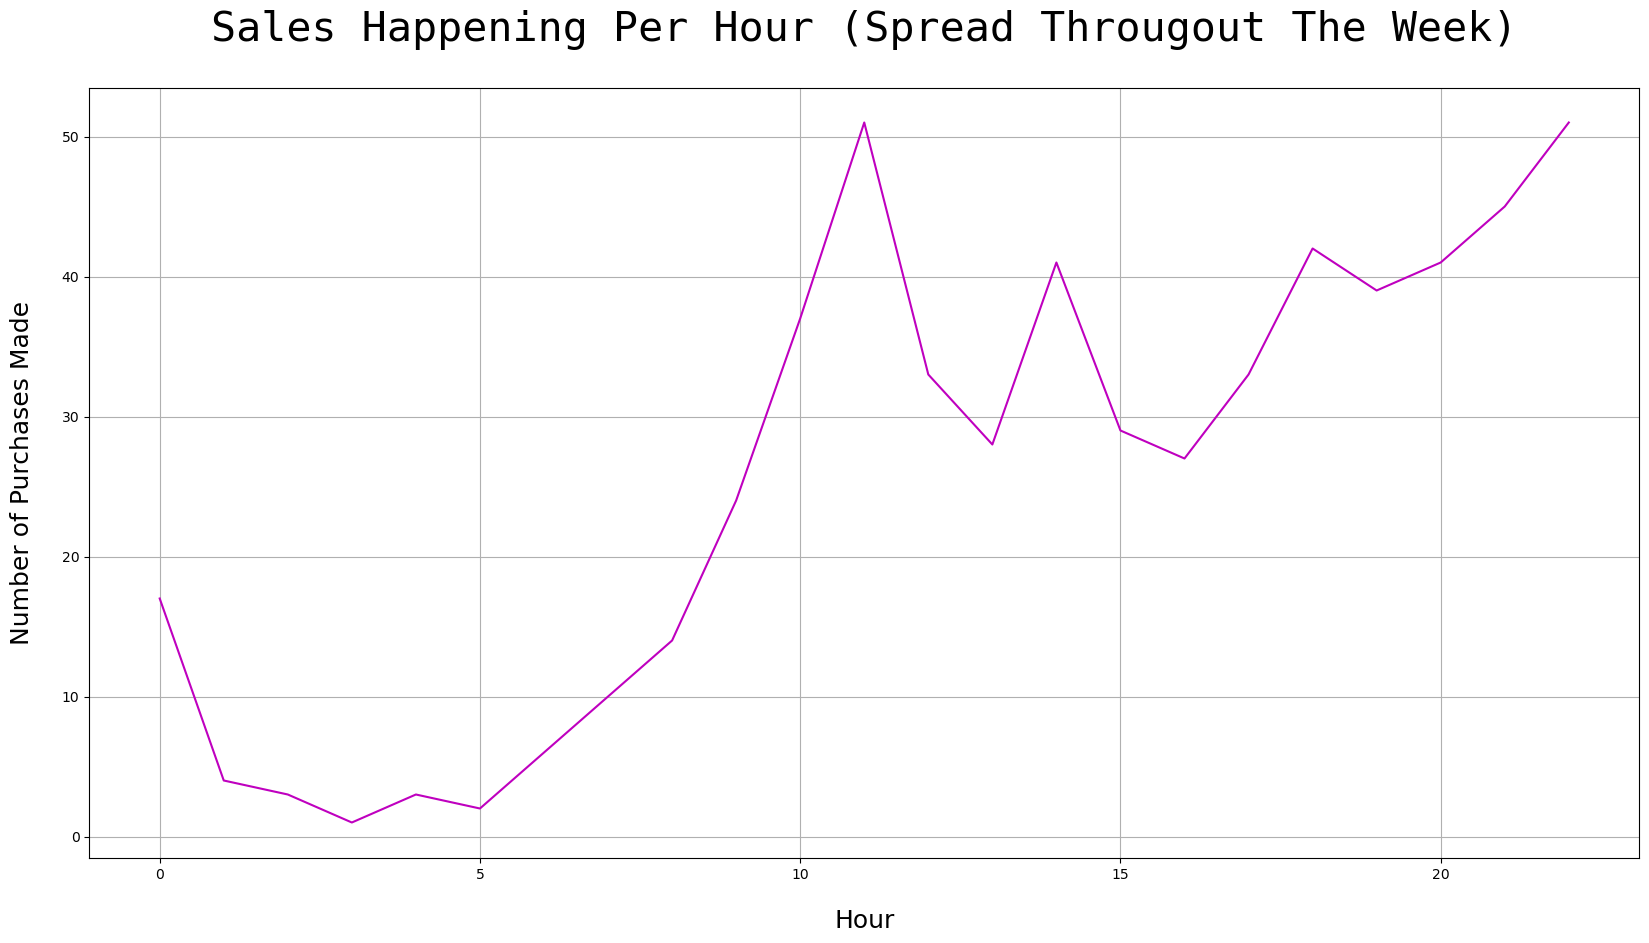

In [20]:
plt.figure(figsize = (20,10))
plt.title('Sales Happening Per Hour (Spread Througout The Week)',fontdict = {'fontname': 'monospace','fontsize': 30} ,y =1.05)
plt.ylabel("Number of Purchases Made",fontsize = 18,labelpad = 20)
plt.xlabel("Hour", fontsize = 18,labelpad =20)
plt.plot(timemost1,timemost2,color = 'm')
plt.grid()
plt.show()